In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# Load data

In [2]:
# Load and preprocess the FashionMNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# Show image


In [4]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

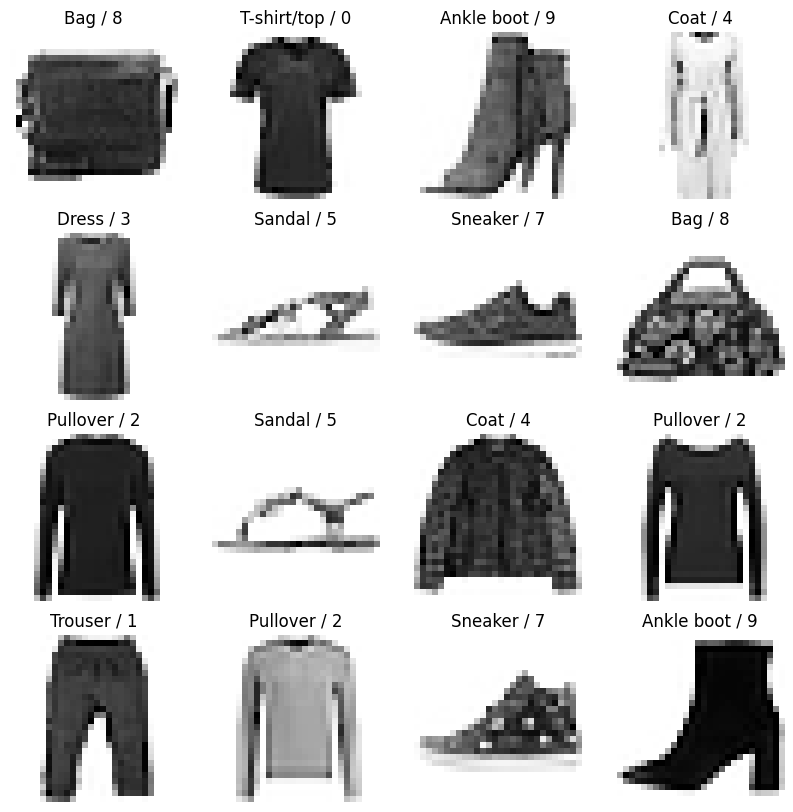

In [5]:
plt.figure(figsize=(10,10))

j=1
for i in np.random.randint(0, 1000, 16):
  plt.subplot(4,4,j); j+=1
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

# Change dimension


In [6]:
x_train.ndim  #current dimension

3

In [7]:
# increase the dimention 3 to 4
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [8]:
x_train.ndim

4

# Feature Scaling

In [9]:
x_train = x_train/255
x_test = x_test/255

## Build the CNN model

In [10]:
cnn_model = keras.Sequential(
    [
        keras.layers.Conv2D(32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

# Compile Model

In [11]:
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model

In [12]:
cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 47s 106ms/step - loss: 0.6807 - accuracy: 0.7554 - val_loss: 0.4537 - val_accuracy: 0.8355
Epoch 2/10
422/422 [==============================] - 43s 103ms/step - loss: 0.4431 - accuracy: 0.8394 - val_loss: 0.3890 - val_accuracy: 0.8620
Epoch 3/10
422/422 [==============================] - 42s 100ms/step - loss: 0.3964 - accuracy: 0.8581 - val_loss: 0.3499 - val_accuracy: 0.8722
Epoch 4/10
422/422 [==============================] - 42s 101ms/step - loss: 0.3648 - accuracy: 0.8702 - val_loss: 0.3269 - val_accuracy: 0.8817
Epoch 5/10
422/422 [==============================] - 43s 102ms/step - loss: 0.3471 - accuracy: 0.8747 - val_loss: 0.3096 - val_accuracy: 0.8845
Epoch 6/10
422/422 [==============================] - 41s 97ms/step - loss: 0.3313 - accuracy: 0.8805 - val_loss: 0.2971 - val_accuracy: 0.8908
Epoch 7/10
422/422 [==============================] - 41s 97ms/step - loss: 0.3170 - accuracy: 0.8860 - val_loss: 0.2944 - val_accu

# Evaluate the model on the test dataset

In [13]:
_, accuracy = cnn_model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.2894 - accuracy: 0.8951
Test accuracy: 0.8950999975204468


# Confusion Matrix

In [14]:
y_pred = cnn_model.predict(x_test)

313/313 [==============================] - 4s 12ms/step


<Axes: >

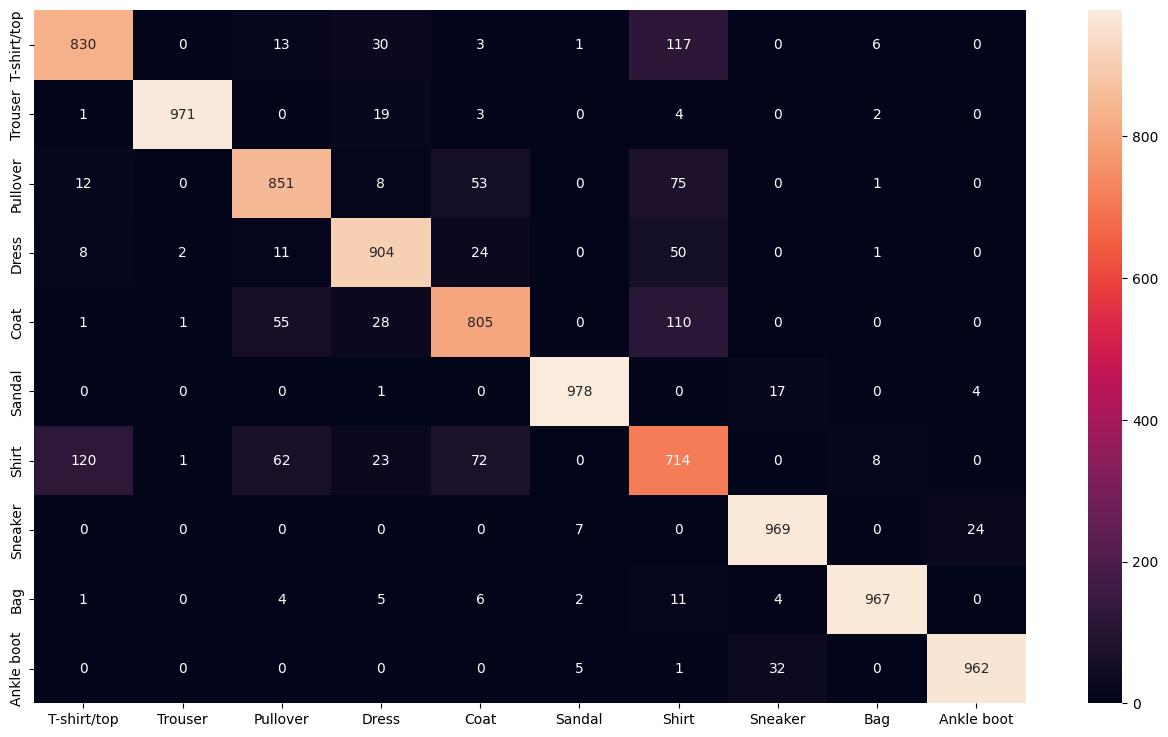

In [15]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [16]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.85      0.85      0.85      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.83      0.81      0.82      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.66      0.71      0.69      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [17]:
cnn_model.save('cnn_model.h5')

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
